In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TWA_Design_Tools import TWA_Design_Toolkit

In [2]:
# Enter the physical parameters of the antenna 
num_straps = 9
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

myTWA = TWA_Design_Toolkit(num_straps=num_straps, f0=f0, k_par_max=k_par)
myTWA.print_key_params()
myTWA.set_center_fed(True)
# set my antenna width to 50% of the distance between straps 
# myTWA.set_strap_width(w=10e-2) TODO: this has been updated 
myTWA.set_strap_width(w=8e-2)
print(f'Strap width: {myTWA.wstr*100} cm')

k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582
You are at resonance, so delta_phi = pi/2. Solving for d given k_par:


----------------Parameter--Box-------------------
Distance between strap centers d = 0.15625 m
The first null will be at 4.468042885105484 m^-1
delta_phi = -0.5 pi
Strap length should be less than lambda/4 = 0.7807095260416667 m
--------------END--Parameter--Box----------------


The antenna length is 1.33 m long
Strap width: 8.0 cm


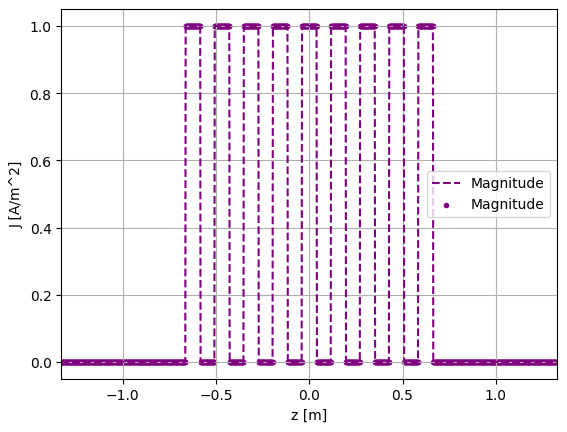

In [3]:
zrange = 100
num_points = int(1e5) # number of grid points for the z grid
zlim = 2*(num_straps*myTWA.wstr + (num_straps-1)*(myTWA.d - myTWA.wstr))/2
plt.xlim(-zlim, zlim)
myTWA.plot_J_of_z(J0=1, zmin=-zrange, zmax=zrange, num_points=num_points)

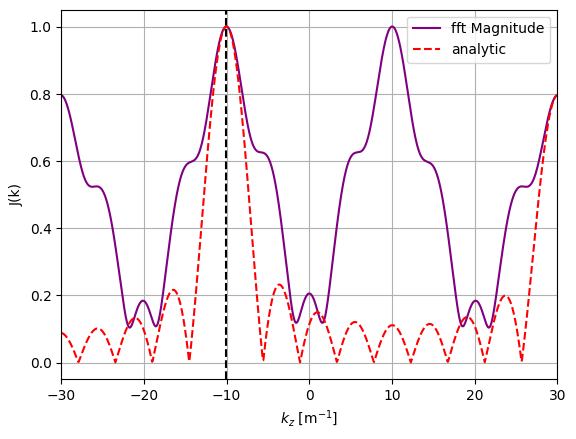

In [4]:
myTWA.plot_J_k_versus_k(zmin=-zrange, zmax=zrange, kplotmin=-30, kplotmax=30, num_pointsz=num_points, num_pointsk=1000, J0=1)

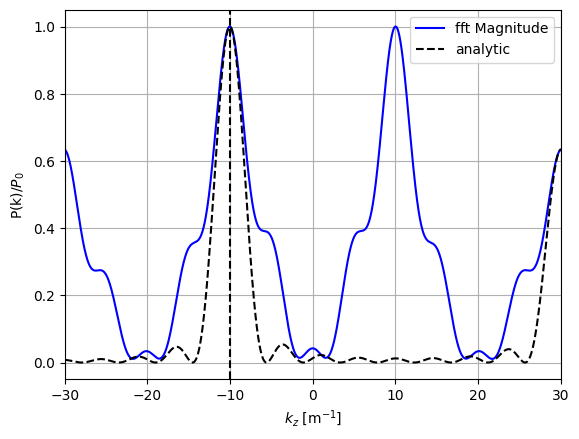

In [5]:
myTWA.plot_normalized_power_versus_k(zmin=-zrange, zmax=zrange, kplotmin=-30, kplotmax=30, num_pointsz=num_points, num_pointsk=1000, J0=1)

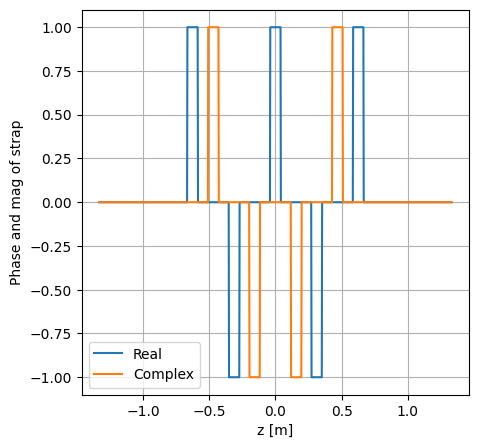

In [19]:
zarray = np.linspace(-zlim, zlim, 1000)
Jarray = np.zeros_like(zarray, dtype='complex')

for i in range(zarray.shape[0]):
    Jarray[i] = myTWA.get_J_z_centerfed(1, zarray[i])

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot(zarray, np.real(Jarray), label='Real')
ax.plot(zarray, np.imag(Jarray), label='Complex')
ax.grid()
ax.set_xlabel('z [m]')
ax.set_ylabel('Phase and mag of strap')
ax.legend()

The port characteristic impedence is Z0 = 83.12100040448948
C0 =  28.141576167613508  pF
w: 0.08
h: 0.01
h2: 0.0025
A: 0.007946006372151997 m^2
l: 0.09932507965189996
d: 0.15625
Cno_cap:  0.70832 pF
Ch2:  2.83328 pF
Cadd_check:  28.141576167613508 pF


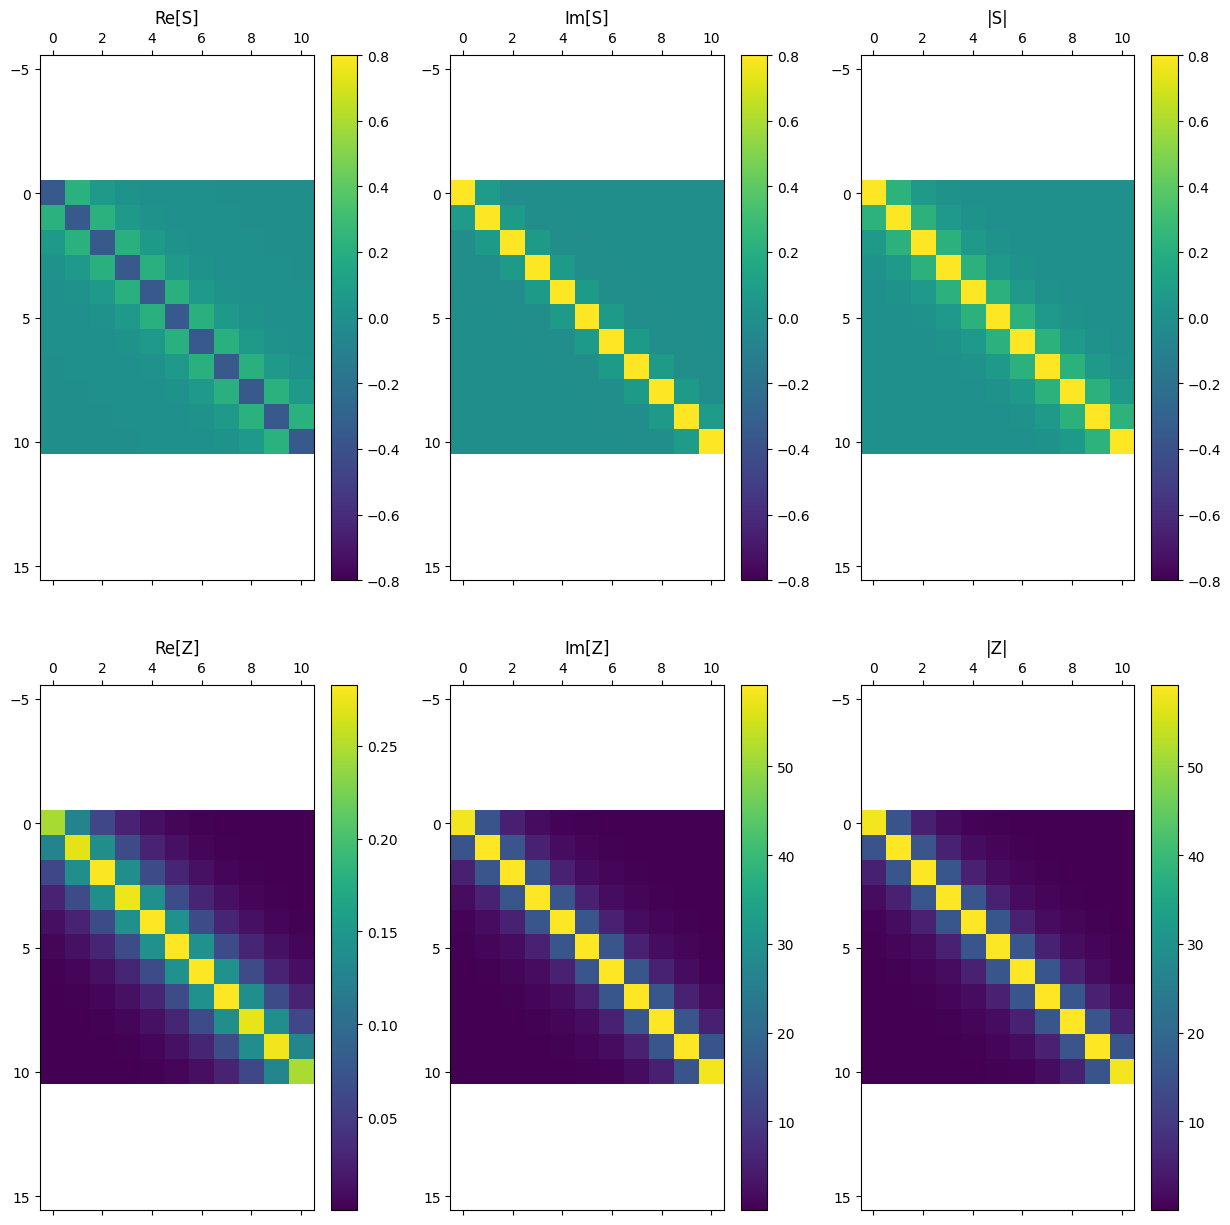

In [20]:
## S and Z matrix Section 
Smatrix_file_name = 'Smat_comsol_centerfed.csv'
Smat = myTWA.read_Smat_from_comsol_portscan_Stable(filename=Smatrix_file_name, return_flag=True)
#print(Smat[1,:])
# Z0 = myTWA.get_coax_Z0(d_outer=0.016, d_inner=0.004)
Z0 = myTWA.get_coax_Z0(d_outer=0.008, d_inner=0.002)
myTWA.get_Z_matrix(Z0_port=Z0)
print(f'The port characteristic impedence is Z0 = {Z0}')
print('C0 = ', myTWA.calculate_C0()/1e-12, ' pF')


ts = 1e-2 #2e-2 # m TODO: updated this 
h = .01
h2 = h/4
w = myTWA.wstr
print(f'w: {w}')
print(f'h: {h}')
print(f'h2: {h2}')
A = myTWA.cap_area_given_gap(h2)
l = A/w
print(f'A: {A} m^2')
print(f'l: {l}')
print(f'd: {myTWA.d}')

Zav = np.trace(np.imag(myTWA.Zmatrix))/8
C0check = 1/(Zav*w0)
Cno_cap = myTWA.epsi0*myTWA.wstr*ts/h
print('Cno_cap: ', Cno_cap/1e-12, 'pF')
Ch2 = myTWA.epsi0*myTWA.wstr*ts/h2
print('Ch2: ', Ch2/1e-12, 'pF')
Cadd_check  = myTWA.epsi0*myTWA.wstr*l/h2
print('Cadd_check: ', Cadd_check/1e-12, 'pF')
myTWA.plot_Smat_and_Zmat()

# Cadd = myTWA.C0 - (Ch2 - Cno_cap)
# print(f'Because you shrunk your gap from {h*100} to {h2*100} cm, you only need to add C0 - (C2-C1) = {Cadd/1e-12} pF')
# Add = Cadd*h2/myTWA.epsi0
# ladd = Add/w
# print(f'ladd: {ladd}')
# print(f'h2: {h2}')
# print('Zav: ', Zav)
# print('C0check: ', C0check)
# C0_check2  = myTWA.epsi0*myTWA.wstr*l/h
# print('C0_check2', C0_check2)

# Cadd_check  = myTWA.epsi0*myTWA.wstr*ladd/h2
# print('Cadd_check: ', Cadd_check)
# myTWA.plot_Smat_and_Zmat()